<a href="https://colab.research.google.com/github/aishna144/SP/blob/master/ISAA_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [ ]:
!pip install catboost

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
dataset =pd.read_csv('IDS_dataset.csv')

In [ ]:
X=dataset.iloc[:,:41].values
y=dataset.iloc[:,41].values

In [ ]:
def Multilabelencoder(X,k):
    from sklearn.preprocessing import LabelEncoder
    X[:,k]= LabelEncoder().fit_transform(X[:,k])
    return X

for i in range(1,4):
    X=Multilabelencoder(X,i)
  
y=LabelEncoder().fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
import time
s=time.time()

import xgboost as xgb
classifier1=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
classifier1.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
classifier2.fit(X_train,y_train)

from sklearn.ensemble import BaggingClassifier
from sklearn import tree
classifier3 = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
classifier3.fit(X_train, y_train)

from sklearn.ensemble import AdaBoostClassifier
classifier4 = AdaBoostClassifier(random_state=1)
classifier4.fit(X_train, y_train)

from sklearn.ensemble import GradientBoostingClassifier
classifier5= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
classifier5.fit(X_train, y_train)

from catboost import CatBoostClassifier
classifier6=CatBoostClassifier()
categorical_features_indices = np.where(dataset.dtypes != np.float)[0]
classifier6.fit(X_train,y_train,eval_set=(X_test, y_test))

import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)
params = {'learning_rate':0.001}
classifier7 = lgb.train(params, train_data, 100) 

from sklearn.ensemble import VotingClassifier
classifier8 = VotingClassifier(estimators=[('classifier1', classifier1), ('classifier2', classifier2),('classifier3', classifier3),('classifier4', classifier4),('classifier5', classifier5),('classifier6', classifier6)], voting='hard')
classifier8.fit(X_train,y_train)

e=[classifier1,classifier2,classifier3,classifier4,classifier5,classifier6,classifier7,classifier8]

X_first=X_test
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance= pca.explained_variance_ratio_
    
import xgboost as xgb
classifier1=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
classifier1.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
classifier2.fit(X_train,y_train)

from sklearn.ensemble import BaggingClassifier
from sklearn import tree
classifier3 = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
classifier3.fit(X_train, y_train)

from sklearn.ensemble import AdaBoostClassifier
classifier4 = AdaBoostClassifier(random_state=1)
classifier4.fit(X_train, y_train)

from sklearn.ensemble import GradientBoostingClassifier
classifier5= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
classifier5.fit(X_train, y_train)

from catboost import CatBoostClassifier
classifier6=CatBoostClassifier()
categorical_features_indices = np.where(dataset.dtypes != np.float)[0]
classifier6.fit(X_train,y_train,eval_set=(X_test, y_test))

import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)
params = {'learning_rate':0.001}
classifier7 = lgb.train(params, train_data, 100) 

from sklearn.ensemble import VotingClassifier
classifier8 = VotingClassifier(estimators=[('classifier1', classifier1), ('classifier2', classifier2),('classifier3', classifier3),('classifier4', classifier4),('classifier5', classifier5),('classifier6', classifier6)], voting='hard')
classifier8.fit(X_train,y_train)

  
f=[classifier1,classifier2,classifier3,classifier4,classifier5,classifier6,classifier7,classifier8]

g=["XG Boost","Random Forest","Bagging Classifier - Decision Tree","Ada Boost",
   "Gradient Boost","Cat Boost","Light GBM","Voting Classifier"]

Learning rate set to 0.06654
0:	learn: 0.5001744	test: 0.5001660	best: 0.5001660 (0)	total: 5.07ms	remaining: 5.06s
1:	learn: 0.3399904	test: 0.3400055	best: 0.3400055 (1)	total: 12.4ms	remaining: 6.19s
2:	learn: 0.2443507	test: 0.2443391	best: 0.2443391 (2)	total: 18.1ms	remaining: 6.02s
3:	learn: 0.1690956	test: 0.1693475	best: 0.1693475 (3)	total: 26.8ms	remaining: 6.68s
4:	learn: 0.1190744	test: 0.1193500	best: 0.1193500 (4)	total: 33.2ms	remaining: 6.61s
5:	learn: 0.0850293	test: 0.0855759	best: 0.0855759 (5)	total: 39.5ms	remaining: 6.54s
6:	learn: 0.0623970	test: 0.0630432	best: 0.0630432 (6)	total: 45.8ms	remaining: 6.5s
7:	learn: 0.0474817	test: 0.0481963	best: 0.0481963 (7)	total: 51.9ms	remaining: 6.43s
8:	learn: 0.0338941	test: 0.0346242	best: 0.0346242 (8)	total: 58.3ms	remaining: 6.42s
9:	learn: 0.0253348	test: 0.0260140	best: 0.0260140 (9)	total: 64.7ms	remaining: 6.4s
10:	learn: 0.0186895	test: 0.0193113	best: 0.0193113 (10)	total: 71.1ms	remaining: 6.39s
11:	learn: 0.0

In [ ]:
def abc(h):
    warnings.filterwarnings("ignore")
    classifier=e[h]
    Y_pred = classifier.predict(X_first)
    #
    for i in range(0,len(Y_pred)):
        if Y_pred[i]>=0.5:
            Y_pred[i]=1
        else: 
            Y_pred[i]=0
    from  sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,Y_pred)
    #
    print("Accuracy of the "+g[h]+" Model is : ",(cm[0][0]+cm[1][1])*100/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))
    print("Precision of the "+g[h]+" Model is : ",(cm[0][0])*100/(cm[0][0]+cm[1][0]))
    print("Recall of the "+g[h]+" Model is : ",(cm[0][0])*100/(cm[0][0]+cm[0][1]))
    #
    classifier=f[h]
    #
    Y_pred = classifier.predict(X_test)
    #
    from matplotlib.colors import ListedColormap
    X_set,y_set=X_test,y_test
    X1,X2= np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
    plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
    plt.xlim(X1.min(),X1.max())
    plt.ylim(X2.min(),X2.max())
    for i,j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],color=ListedColormap(('red','green'))(i),label=j)
    plt.title('Principal Component Analysis for Prediction using '+g[h])
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

In [ ]:
def ANN():
    ANN_dataset=[[0]*8 for i in range(5039)]
    for j in range(8):
        classifier=e[j]
        Y_predn = classifier.predict(X_first)
        for i in range(0,len(Y_predn)):
            if Y_predn[i]>=0.5:
                ANN_dataset[i][j]=1
            else: 
                ANN_dataset[i][j]=0    
    A=pd.DataFrame(ANN_dataset)
    b=y_test
    # print(A.shape,b.shape)
    from sklearn.model_selection import train_test_split
    X_trainn, X_testn, y_trainn, y_testn =train_test_split(A,b,test_size=0.2,random_state=0)
    
    #Making ANN
    #Importing Keras libraries and packages
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import Dropout
    #Initializing ANN
    classifier = Sequential()
    
    #Adding input layer and first hidden layer
    classifier.add(Dense(4,activation='relu',input_dim=8))
    classifier.add(Dropout(rate=0.1))
    
    #Adding output layer
    classifier.add(Dense(1,activation='sigmoid'))
    
    #Compiling ANN
    classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    
    #Fitting ANN to training set
    classifier.fit(X_trainn,y_trainn,batch_size=10,epochs=1)
    
    #Making Prediction and Evaluating model
    #prediction
    y_pred = classifier.predict(X_testn)
    y_pred = (y_pred > 0.5)
    
    #confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_testn,y_pred)
    
    #Evaluating ANN
    from keras.wrappers.scikit_learn import KerasClassifier
    from sklearn.model_selection import cross_val_score
    def build_classifier():
        classifier = Sequential()
        classifier.add(Dense(4,activation='relu',input_dim=8))
        classifier.add(Dense(1,activation='sigmoid'))
        classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
        return classifier
    
    classifier = KerasClassifier(build_fn = build_classifier,batch_size=10,nb_epoch=1)
    accuracies = cross_val_score(estimator=classifier,X=X_trainn, y=y_trainn,cv=10)
    mean=accuracies.mean()
    variance=accuracies.std()
    
    #Tuning the ANN
    from keras.wrappers.scikit_learn import KerasClassifier
    from sklearn.model_selection import GridSearchCV
    from keras.models import Sequential
    from keras.layers import Dense
    
    def build_classifier(optimizer):
        classifier = Sequential()
        classifier.add(Dense(4,activation='relu',input_dim=8))
        classifier.add(Dense(1,activation='sigmoid'))
        classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
        return classifier
    
    classifier = KerasClassifier(build_fn = build_classifier)
    grid_param={'batch_size':[25,32],'nb_epoch':[100,500],'optimizer':['adam','rmsprop']}
    grid_search = GridSearchCV(estimator=classifier,param_grid=grid_param,scoring='accuracy',cv=5)
    grid_search = grid_search.fit(X_trainn,y_trainn)
    best_parameters=grid_search.best_params_
    best_accuracy = grid_search.best_score_

In [ ]:
import multiprocessing as mp
def master():
    if __name__=='__main__':
        while(1):
            warnings.filterwarnings("ignore")
            s=int(input("""\nWelcome to Network Intrusion Detection System
                    Make your choice :
                    0. XG Boost
                    1. Random Forest
                    2. Bagging Classifier - Decision Tree
                    3. Ada Boost
                    4. Gradient Boost
                    5. Cat Boost
                    6. Light GBM
                    7. Voting Classifier
                    8. Run all Algorithms
                    9. Quit\n"""))
            if(s<8):
                abc(s)
            elif(s==8):
                s=int(input("""Select how you want to run it :
                                0. Serially
                                1. Artificial Neural Network
                                2. Go Back\n"""))
                if(s==0):
                    for i in range(8):
                        abc(i)
                elif(s==1):
                    ANN()
                elif(s==2):
                    pass;
                else:
                    print("Invalid Choice :( Try Again")
            elif(s==9):
                break;
            else:
                print("Invalid Choice :( Try Again")
    else:
        pass

In [ ]:
def parallel():
    p=mp.Pool(8)
    for h in range(4):
        p.apply_async(abc,args=(h,))
    p.close()
    p.join()


Welcome to Network Intrusion Detection System
                    Make your choice :
                    0. XG Boost
                    1. Random Forest
                    2. Bagging Classifier - Decision Tree
                    3. Ada Boost
                    4. Gradient Boost
                    5. Cat Boost
                    6. Light GBM
                    7. Voting Classifier
                    8. Run all Algorithms
                    9. Quit
8
Select how you want to run it :
                                0. Serially
                                1. Artificial Neural Network
                                2. Go Back
0
Accuracy of the XG Boost Model is :  99.8809287557055
Precision of the XG Boost Model is :  99.88088147706968
Recall of the XG Boost Model is :  100.0


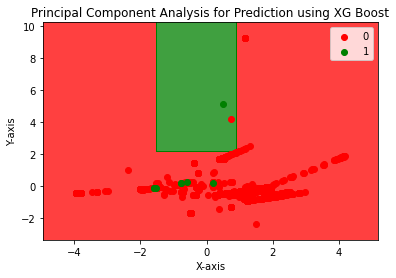

Accuracy of the Random Forest Model is :  99.8809287557055
Precision of the Random Forest Model is :  99.88088147706968
Recall of the Random Forest Model is :  100.0


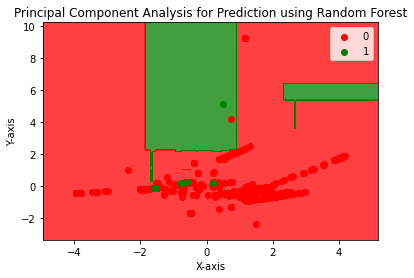

Accuracy of the Bagging Classifier - Decision Tree Model is :  99.90077396308791
Precision of the Bagging Classifier - Decision Tree Model is :  99.94038155802862
Recall of the Bagging Classifier - Decision Tree Model is :  99.96024647187438


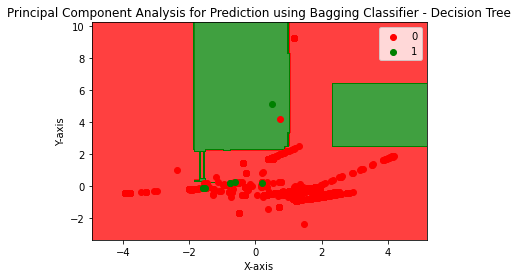

Accuracy of the Ada Boost Model is :  99.96030958523517
Precision of the Ada Boost Model is :  99.98012323593719
Recall of the Ada Boost Model is :  99.98012323593719


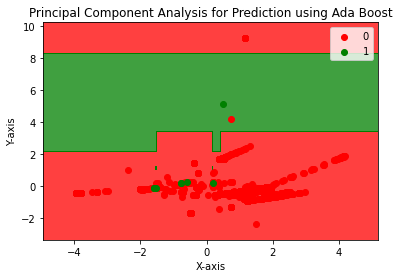

Accuracy of the Gradient Boost Model is :  99.90077396308791
Precision of the Gradient Boost Model is :  99.90071485305798
Recall of the Gradient Boost Model is :  100.0


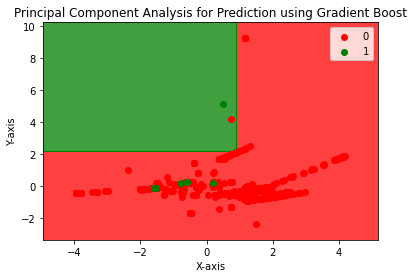

Accuracy of the Cat Boost Model is :  99.90077396308791
Precision of the Cat Boost Model is :  99.90071485305798
Recall of the Cat Boost Model is :  100.0


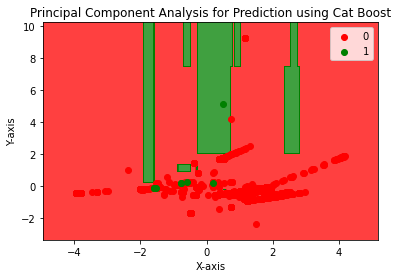

Accuracy of the Light GBM Model is :  99.84123834094066
Precision of the Light GBM Model is :  99.84123834094066
Recall of the Light GBM Model is :  100.0


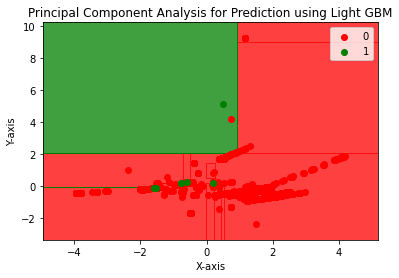

Accuracy of the Voting Classifier Model is :  99.90077396308791
Precision of the Voting Classifier Model is :  99.90071485305798
Recall of the Voting Classifier Model is :  100.0


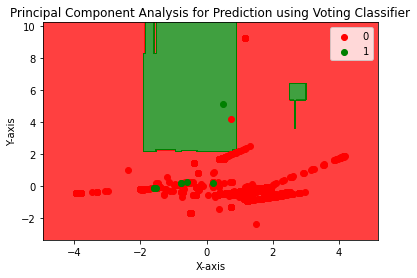


Welcome to Network Intrusion Detection System
                    Make your choice :
                    0. XG Boost
                    1. Random Forest
                    2. Bagging Classifier - Decision Tree
                    3. Ada Boost
                    4. Gradient Boost
                    5. Cat Boost
                    6. Light GBM
                    7. Voting Classifier
                    8. Run all Algorithms
                    9. Quit
8
Select how you want to run it :
                                0. Serially
                                1. Artificial Neural Network
                                2. Go Back
1
162/162 [==============================] - 1s 1ms/step - loss: 0.6284 - accuracy: 0.9980

Welcome to Network Intrusion Detection System
                    Make your choice :
                    0. XG Boost
                    1. Random Forest
                    2. Bagging Classifier - Decision Tree
                    3. Ada Boost
                    

In [ ]:
master();